In [1]:
import pandas as pd
from pybrainlife.data.collect import collect_data
import pybrainlife.data.manipulate as pybldm
import pybrainlife.vis.plots as pyblvp
import seaborn as sns

In [2]:
#!pip install --upgrade pybrainlife

In [4]:
# collect_data(datatype name, list of datatype tags, list of object tags, filename, output file name, whether it's a network adjaceny matrix or not)
tractmeasures_df,_,_ = collect_data('neuro/tractmeasures',['macro'],['minfodamp_0p025','minfodamp_0p05','minfodamp_0p1','minfodamp_0p2', 'minfodamp_0p3', 'minfodamp_0p4', 'minfodamp_0p5'],'tractmeasures.csv','tractmeasures_minfodamp.csv')
tractmeasures_df.head()

,structureID,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev,averageFullDisplacement,fullDisplacementStdev,ExponentialFitA,ExponentialFitB,StreamlineLengthTotal,...,averageMidpointDistanceFromCentroid,stDevOfMidpointDistanceFromCentroid,TotalVolumeProportion,TotalCountProportion,TotalWiringProportion,subjectID,sessionID,tags,datatype_tags,finish_dates
0,wbfg,1630,17426,52.009343,15.871092,42.258814,12.013210,0.018322,-0.000275,84775.228437,...,NaN,NaN,1.000000,1.000000,1.000000,100610,1,"[2_26_2023, minfodamp_0p05]","[roi_trekker, macro]",2023-03-03T01:05:09.522Z
1,ROI_thalamus-8115_ROI_lh.onset,410,6526,61.976337,5.241401,51.405366,2.995433,NaN,NaN,25410.298197,...,4.711537,4.334358,0.374498,0.251534,0.299737,100610,1,"[2_26_2023, minfodamp_0p05]","[roi_trekker, macro]",2023-03-03T01:05:09.522Z
2,ROI_thalamus-8115_ROI_lh.pmhg,389,1672,32.247494,3.295205,26.852670,2.786135,NaN,NaN,12544.275000,...,2.237148,1.219230,0.095949,0.238650,0.147971,100610,1,"[2_26_2023, minfodamp_0p05]","[roi_trekker, macro]",2023-03-03T01:05:09.522Z
3,ROI_thalamus-8215_ROI_rh.onset,524,9679,67.104569,5.663979,52.984730,1.953344,NaN,NaN,35162.794081,...,7.502148,3.761298,0.555434,0.321472,0.414777,100610,1,"[2_26_2023, minfodamp_0p05]","[roi_trekker, macro]",2023-03-03T01:05:09.522Z
4,ROI_thalamus-8215_ROI_rh.pmhg,307,1872,37.973489,4.268527,31.257262,2.768354,NaN,NaN,11657.861160,...,3.179375,1.928803,0.107426,0.188344,0.137515,100610,1,"[2_26_2023, minfodamp_0p05]","[roi_trekker, macro]",2023-03-03T01:05:09.522Z


In [5]:
tractmeasures_df['tags'] = [ f[1] for f in tractmeasures_df.tags ]
tractmeasures_df = tractmeasures_df.loc[tractmeasures_df['structureID'] != 'wbfg']
tractmeasures_df.head()

,structureID,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev,averageFullDisplacement,fullDisplacementStdev,ExponentialFitA,ExponentialFitB,StreamlineLengthTotal,...,averageMidpointDistanceFromCentroid,stDevOfMidpointDistanceFromCentroid,TotalVolumeProportion,TotalCountProportion,TotalWiringProportion,subjectID,sessionID,tags,datatype_tags,finish_dates
1,ROI_thalamus-8115_ROI_lh.onset,410,6526,61.976337,5.241401,51.405366,2.995433,NaN,NaN,25410.298197,...,4.711537,4.334358,0.374498,0.251534,0.299737,100610,1,minfodamp_0p05,"[roi_trekker, macro]",2023-03-03T01:05:09.522Z
2,ROI_thalamus-8115_ROI_lh.pmhg,389,1672,32.247494,3.295205,26.852670,2.786135,NaN,NaN,12544.275000,...,2.237148,1.219230,0.095949,0.238650,0.147971,100610,1,minfodamp_0p05,"[roi_trekker, macro]",2023-03-03T01:05:09.522Z
3,ROI_thalamus-8215_ROI_rh.onset,524,9679,67.104569,5.663979,52.984730,1.953344,NaN,NaN,35162.794081,...,7.502148,3.761298,0.555434,0.321472,0.414777,100610,1,minfodamp_0p05,"[roi_trekker, macro]",2023-03-03T01:05:09.522Z
4,ROI_thalamus-8215_ROI_rh.pmhg,307,1872,37.973489,4.268527,31.257262,2.768354,NaN,NaN,11657.861160,...,3.179375,1.928803,0.107426,0.188344,0.137515,100610,1,minfodamp_0p05,"[roi_trekker, macro]",2023-03-03T01:05:09.522Z
1,ROI_thalamus-8115_ROI_lh.onset,240,7629,56.853599,6.939971,48.388959,2.622586,NaN,NaN,13644.863731,...,7.941417,4.570480,0.445880,0.229008,0.307078,101006,1,minfodamp_0p025,"[roi_trekker, macro]",2023-03-05T14:28:55.058Z


In [11]:
colorsPoss = ['blue', 'orange', 'green', 'red', 'purple', 'cadetblue', 'magenta', 'seagreen']
colors = colorsPoss[:len(tractmeasures_df.tags.unique())]
labels = ['lh.onset', 'lh.pmhg', 'rh.onset', 'rh.pmhg']

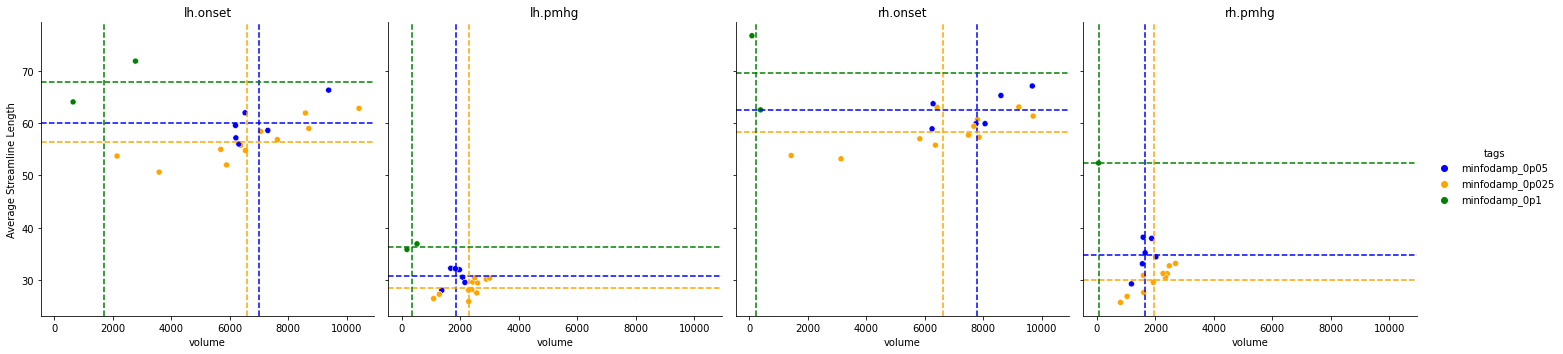

In [12]:
g = sns.relplot(x='volume',y='avgerageStreamlineLength',data=tractmeasures_df,hue='tags',col='structureID', palette = colors)

meansVol = []
meansLen = []

for tractID in tractmeasures_df.structureID.unique():
    for stepsize in tractmeasures_df.tags.unique():
        temp = tractmeasures_df[(tractmeasures_df['structureID'] == tractID) & (tractmeasures_df['tags'] == stepsize)]
        meansVol.append(temp.volume.mean())
        meansLen.append(temp.avgerageStreamlineLength.mean())
        
idx = 0
label_i = 0
for ax in g.axes.flat:
    for i in range(len(tractmeasures_df.tags.unique())):
        ax.axvline(meansVol[idx], ls = '--', color = colors[i])
        ax.axhline(meansLen[idx], ls = '--', color = colors[i])
        idx += 1
    ax.set_title(labels[label_i])
    if label_i == 0:
        ax.set_ylabel('Average Streamline Length')
    label_i += 1

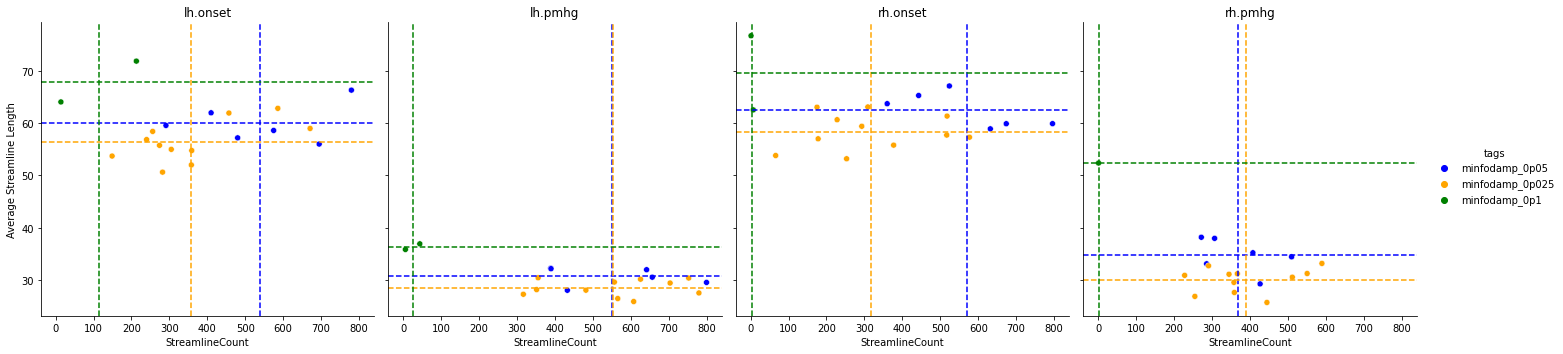

In [13]:
g = sns.relplot(x='StreamlineCount',y='avgerageStreamlineLength',data=tractmeasures_df,hue='tags',col='structureID', palette = colors)

meansCount = []
meansLen = []

for tractID in tractmeasures_df.structureID.unique():
    for stepsize in tractmeasures_df.tags.unique():
        temp = tractmeasures_df[(tractmeasures_df['structureID'] == tractID) & (tractmeasures_df['tags'] == stepsize)]
        meansCount.append(temp.StreamlineCount.mean())
        meansLen.append(temp.avgerageStreamlineLength.mean())
        
idx = 0
label_i = 0
for ax in g.axes.flat:
    for i in range(len(tractmeasures_df.tags.unique())):
        ax.axvline(meansCount[idx], ls = '--', color = colors[i])
        ax.axhline(meansLen[idx], ls = '--', color = colors[i])
        idx += 1
    ax.set_title(labels[label_i])
    if label_i == 0:
        ax.set_ylabel('Average Streamline Length')
    label_i += 1

In [14]:
tractmeasures_df.groupby(['structureID', 'tags']).count()

StreamlineCount  volume  \
structureID                    tags                                       
ROI_thalamus-8115_ROI_lh.onset minfodamp_0p025               11      11   
                               minfodamp_0p05                 6       6   
                               minfodamp_0p1                  2       2   
ROI_thalamus-8115_ROI_lh.pmhg  minfodamp_0p025               11      11   
                               minfodamp_0p05                 6       6   
                               minfodamp_0p1                  2       2   
ROI_thalamus-8215_ROI_rh.onset minfodamp_0p025               11      11   
                               minfodamp_0p05                 6       6   
                               minfodamp_0p1                  2       2   
ROI_thalamus-8215_ROI_rh.pmhg  minfodamp_0p025               11      11   
                               minfodamp_0p05                 6       6   
                               minfodamp_0p1                  1       1   

                                                avgerageStreamlineLength  \
structureID                    tags                                        
ROI_thalamus-8115_ROI_lh.onset minfodamp_0p025                        11   
                               minfodamp_0p05                          6   
                               minfodamp_0p1                           2   
ROI_thalamus-8115_ROI_lh.pmhg  minfodamp_0p025                        11   
                               minfodamp_0p05                          6   
                               minfodamp_0p1                           2   
ROI_thalamus-8215_ROI_rh.onset minfodamp_0p025                        11   
                               minfodamp_0p05                          6   
                               minfodamp_0p1                           2   
ROI_thalamus-8215_ROI_rh.pmhg  minfodamp_0p025                        11   
                               minfodamp_0p05                          6   
                               minfodamp_0p1                           1   

                                                streamlineLengthStdev  \
structureID                    tags                                     
ROI_thalamus-8115_ROI_lh.onset minfodamp_0p025                     11   
                               minfodamp_0p05                       6   
                               minfodamp_0p1                        2   
ROI_thalamus-8115_ROI_lh.pmhg  minfodamp_0p025                     11   
                               minfodamp_0p05                       6   
                               minfodamp_0p1                        2   
ROI_thalamus-8215_ROI_rh.onset minfodamp_0p025                     11   
                               minfodamp_0p05                       6   
                               minfodamp_0p1                        2   
ROI_thalamus-8215_ROI_rh.pmhg  minfodamp_0p025                     11   
                               minfodamp_0p05                       6   
                               minfodamp_0p1                        1   

                                                averageFullDisplacement  \
structureID                    tags                                       
ROI_thalamus-8115_ROI_lh.onset minfodamp_0p025                       11   
                               minfodamp_0p05                         6   
                               minfodamp_0p1                          2   
ROI_thalamus-8115_ROI_lh.pmhg  minfodamp_0p025                       11   
                               minfodamp_0p05                         6   
                               minfodamp_0p1                          2   
ROI_thalamus-8215_ROI_rh.onset minfodamp_0p025                       11   
                               minfodamp_0p05                         6   
                               minfodamp_0p1                          2   
ROI_thalamus-8215_ROI_rh.pmhg  minfodamp_0p025                       11   
         